In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import sys
import seaborn as sns
sys.path.append('../src/')
sys.path.append('../src/exp_004')
from preprocess import read_data, get_data

In [2]:
train, test, submit = read_data()

In [3]:
train.head()

,id,year,month,day,Country,City,lat,lon,co_cnt,co_min,...,ws_min,ws_mid,ws_max,ws_var,dew_cnt,dew_min,dew_mid,dew_max,dew_var,pm25_mid
0,1,2019,1,1,Australia,Brisbane,-27.46794,153.02809,38,0.749,...,0.241,1.088,3.101,1.983,17,7.671,10.358,15.112,13.424,19.901
1,2,2019,1,1,Australia,Darwin,-12.46113,130.84185,47,2.594,...,0.828,3.473,7.396,10.411,62,21.324,23.813,24.221,2.021,13.741
2,3,2019,1,1,Australia,Melbourne,-37.81400,144.96332,17,1.190,...,0.000,2.107,8.089,15.719,22,10.309,13.133,15.422,6.355,25.918
3,4,2019,1,1,Australia,Newcastle,-32.92953,151.78010,63,4.586,...,0.284,0.503,3.592,2.485,116,7.146,10.685,13.344,9.417,174.370
4,5,2019,1,1,Australia,Perth,-31.95224,115.86140,47,4.689,...,0.500,0.755,3.396,1.937,93,1.091,3.277,12.272,4.109,167.063


In [4]:
train['test'] = 0
test['test'] = 1
all_data = pd.concat([train, test])

In [5]:
all_data['date'] = pd.to_datetime(all_data['year'].astype(str) + '-' + all_data['month'].astype(str) + '-' + all_data['day'].astype(str))
all_data.head()

,id,year,month,day,Country,City,lat,lon,co_cnt,co_min,...,ws_max,ws_var,dew_cnt,dew_min,dew_mid,dew_max,dew_var,pm25_mid,test,date
0,1,2019,1,1,Australia,Brisbane,-27.46794,153.02809,38,0.749,...,3.101,1.983,17,7.671,10.358,15.112,13.424,19.901,0,2019-01-01
1,2,2019,1,1,Australia,Darwin,-12.46113,130.84185,47,2.594,...,7.396,10.411,62,21.324,23.813,24.221,2.021,13.741,0,2019-01-01
2,3,2019,1,1,Australia,Melbourne,-37.81400,144.96332,17,1.190,...,8.089,15.719,22,10.309,13.133,15.422,6.355,25.918,0,2019-01-01
3,4,2019,1,1,Australia,Newcastle,-32.92953,151.78010,63,4.586,...,3.592,2.485,116,7.146,10.685,13.344,9.417,174.370,0,2019-01-01
4,5,2019,1,1,Australia,Perth,-31.95224,115.86140,47,4.689,...,3.396,1.937,93,1.091,3.277,12.272,4.109,167.063,0,2019-01-01


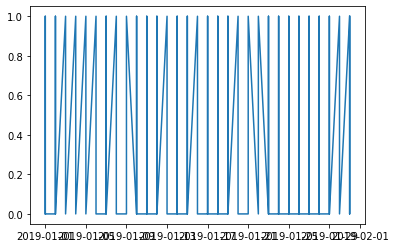

In [16]:
import matplotlib.pyplot as plt
data = all_data[all_data.date < '2019-02-01'].sort_values('date')
plt.plot(data['date'], data['test'])

In [17]:
all_data.groupby('date')['pm25_mid'].count().sort_values()

date
2020-02-24     30
2020-01-24     33
2020-02-22     42
2020-02-27     44
2020-02-17     45
             ... 
2020-09-06    227
2020-11-06    227
2021-03-03    228
2020-10-06    228
2020-04-06    228
Name: pm25_mid, Length: 1095, dtype: int64